In [1]:
from PIL import Image
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [2]:
@jit(nopython=True)
def _filter2d(image : np.ndarray, filter : np.ndarray, padding : int) -> np.ndarray:
    '''
    This function uses JIT compilation supported functions only to give
    huge boost in performance. We are talking about around 10x speedup here.
    '''

    filtered_image = np.zeros(
        (image.shape[0] - 2 * padding, image.shape[1] - 2 * padding), dtype=np.float64
    )

    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            img_chunk = image[i-padding:i+padding+1, j-padding:j+padding+1]
            filtered_image[i - padding, j - padding] = np.sum(filter * img_chunk)

    return filtered_image


def filter2d(image : np.ndarray, filter : np.ndarray) -> np.ndarray:
    '''
    This function applies a 2D square filter with odd dimensions to an image.
    '''

    if filter.shape[0] != filter.shape[1]:
        raise ValueError("Filter must be square")
    if filter.shape[0] % 2 == 0:
        raise ValueError("Filter must have odd dimensions")

    padding = filter.shape[0] // 2
    padded_image = np.pad(image, (padding, padding), mode = 'edge', )

    return _filter2d(padded_image, filter, padding)


def arr_to_img(arr : np.ndarray, absolute = True) -> Image.Image:
    '''
    Converts the array to an image, by default takes absolute value of array
    '''

    if absolute:
        arr = np.abs(arr)
    return Image.fromarray(np.uint8(arr))


def plot_images(images : list[str, Image.Image], cmap = 'gray', nrows = None, ncols = None) -> None:
    '''
    This function plots a list of images.
    One can provide nrows and ncols to specify the number of rows and columns in the plot.
    '''

    if nrows is None and ncols is None:
        nrows = 1
        ncols = len(images)

    if (nrows*ncols) < len(images):
        raise ValueError("Number of rows and columns does not fit the number of images")

    fig, axs = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))
    if nrows == 1 and ncols == 1:
        axs = np.array([axs])

    axs = axs.reshape((nrows*ncols))

    for i, (title, img) in enumerate(images):
        axs[i].imshow(img, cmap=cmap)
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.show()

In [3]:
filtered_images_1 = dict()

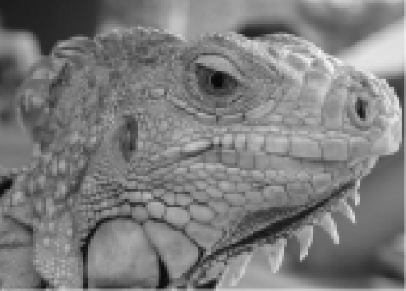

In [4]:
try:
    imgsrc = Image.open('res/Examques.png').convert('L')
except FileNotFoundError:
    imgsrc = Image.open(input('File Path')).convert('L')

image_arr2 = np.array(imgsrc, dtype=np.float64)

imgsrc

In [5]:
prewitt_dx = np.array((
    (-1, 0, 1),
    (-1, 0, 1),
    (-1, 0, 1)
)) / 3.

filtered_images_1["Prewitt dx"] = filter2d(image_arr2, prewitt_dx)

prewitt_dy = prewitt_dx.T

filtered_images_1["Prewitt dy"] = filter2d(image_arr2, prewitt_dy)

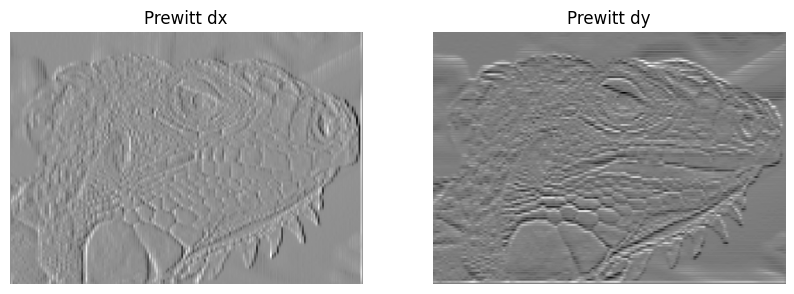

In [6]:
plot_images([(name, img) for name, img in filtered_images_1.items()])